## Logistic Regression

In its most basic form, logistic regression is a binary classification algorithm that classifies data into two groups. For example, a common use case of logistic regression could be predicting whether a customer will buy a car or not. 

Logistic regression takes an observation $x$ as input and outputs the predicted probability that $x$ belongs to the positive class. Similar to linear regression, we are trying to find the best weights $w$ to weigh the features of the data. However, if we simply take a weighted sum of the features ($w^{\top}x$), this would not be a probability (because the range of $w^{\top}x$ is $(-\infty, \infty)$, whereas we really want the range to be [0, 1] for it to be interpreted as a probability). Therefore, we want to "squash" $w^{\top}x$ into a number between 0 and 1. We do this by using the **sigmoid** function: $$ f(w^{\top}x) = \frac{1}{1 + e^{-w^{\top}x}} $$ 

The range of the sigmoid function is (0, 1) which we can see by looking at the value of the sigmoid at different values. The sigmoid is also symmetric around $y = 0.5$.  
$$ 
\begin{aligned} 
\lim_{x \to -\infty} f(x) &= 0 \\ \lim_{x \to \infty} f(x) &= 1 \\ f(0) &= 0.5 
\end{aligned} 
$$

Squashing the output of $ w^{\top}x $ to predict the probability $p$ turns out to be equivalent to using a linear model $ w^{\top}x $ to predict the log odds, $\log(\frac{p}{1-p})$. 


$$
\begin{aligned}
p &= \frac{1}{1 + e^{-w^{\top}x}} \\ \frac{1}{p} &= 1 + e^{-w^{\top}x} \\ \frac{1}{p} - \frac{p}{p} &= e^{-w^{\top}x} \\ \frac{1-p}{p} &= e^{-w^{\top}x} \\ \frac{p}{1-p} &= e^{w^{\top}x} \\ \log \frac{p}{1-p} &= w^{\top}x 
\end{aligned}
$$

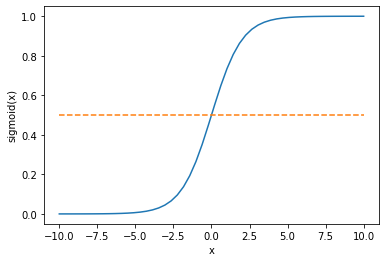

In [6]:
import matplotlib.pyplot as plt
import numpy as np

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x = np.linspace(-10, 10, 50)
y_sigmoid = sigmoid(x)
y_mid = np.ones(50) / 2

plt.plot(x, y_sigmoid)
plt.plot(x, y_mid, linestyle='dashed')
plt.xlabel("x")
plt.ylabel("sigmoid(x)")
plt.show()

We now know the goal of logistic regression (binary classification) and how logistic regression can take in data and output probabilities (sigmoid function), but we still need to understand how logistic regression finds the best weights $w$. In linear regression, we learned the best weights $w$ by using least squares. However, least squares would not be a good method to use for logistic regression for several reasons. 

1) Least squares would heavily penalize outliers even if those outliers should not be affecting the decision boundary very much. 

2) Least squares has a probabilistic justification for being used to optimize linear regression. Least squares is equivalent to the MLE under the Gaussian noise assumption. 



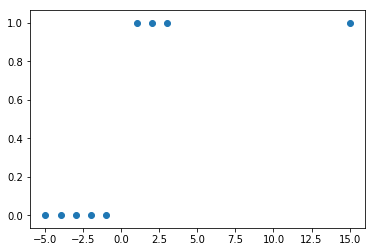

In [9]:
import matplotlib.pyplot as plt
import numpy as np

X = np.array([-5, -4, -3, -2, -1, 1, 2, 3, 15])
y = np.array([0, 0, 0, 0, 0, 1, 1, 1, 1])

plt.scatter(X, y)
plt.show()

As a result, we instead minimize cross entropy loss (or log loss) to calculate the best weights for logistic regression. We cannot simply take the gradient and come up with a closed form solution as we did in the linear regression case because we no longer end up with a linear system of equations when we set the gradient equal to zero. We instead use **gradient descent** or **stochastic gradient descent** to minimize the cross entropy loss. By performing gradient descent using the gradients of the cross entropy loss with respect to the logistic regression weights, we can find the weights that minimize the loss. 

#### Pros/Cons

Pros:
* Easy to train
* Gives interpretable output (probability of class 1)

Cons:
* Linear decision boundary can lead to underfitting
* Would need to choose correct feature transformation to form non-linear decision boundaries